# Obstacle Avoidance

This notebook is an extension of our obstacle avoidance lab, demonstrating a simple addition that simulates Frogger more effectively.

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

The following code is directly from the obstacle avoidance lab, showing how an optimal path is created.

In [3]:
def obstacle(x, y, W1=1, r=(1, 1), c=(0, 0)):
    """
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    """

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x, y, W1=1, r=(1, 1,), c=(0, 0)):
    """
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    """

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x, y, W1=1, r=(1, 1,), c=(0, 0)):
    """
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    """

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

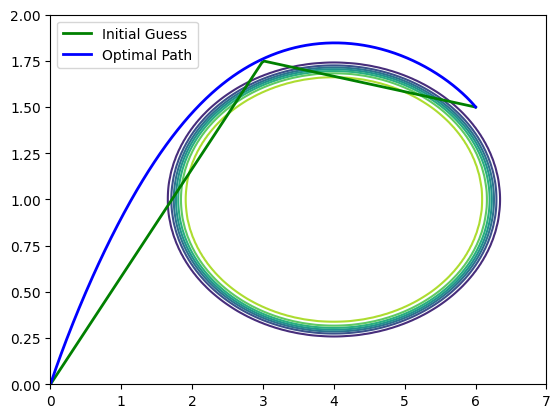

In [4]:
def avoid_obstacle():
    """
    Find the optimal path for the fixed time horizon problem
    """
    # Define the parameters for the system
    W1 = 3
    W2 = 70
    r = (5, 0.5)
    c = (4, 1)
    
    # Define the ODE for the system
    def ode(t, y):
        return np.array([
            y[2],
            y[3],
            y[6] / (2 * W2),
            y[7] / (2 * W2),
            obstacle_dx(y[0], y[1], W1, r, c),
            obstacle_dy(y[0], y[1], W1, r, c),
            -y[4],
            -y[5]
        ])
    
    # Define the boundary conditions
    def bc(ya, yb):
        return np.array([
            ya[0] - 6,
            ya[1] - 1.5,
            ya[2],
            ya[3],
            yb[0],
            yb[1],
            yb[2],
            yb[3]
        ])
    
    # Define the initial guess
    t_steps = 200
    t_eval = np.linspace(0, 20, t_steps)
    y0 = np.ones((8, t_steps))
    x = np.linspace(0, 6, t_steps)
    y1 = (1.75 / 3) * x[:int(t_steps / 2)]
    y2 = (1.5 - 1.75) / 3 * (x[int(t_steps / 2):] - 3) + 1.75
    y_init = np.concatenate((y1, y2))
    y0[0, :] = x[::-1]
    y0[1, :] = y_init[::-1]
    y0[2, :] = -1 * np.ones(t_steps)
    
    # Solve the ODE
    sol = solve_bvp(ode, bc, t_eval, y0, max_nodes=30000)
    
    # Plot the obstacle
    X, Y = np.meshgrid(np.linspace(0, 7, 200), np.linspace(0, 2, 200))
    plt.contour(X, Y, obstacle(X, Y, W1, r, c))
    
    # Plot the solution
    plt.plot(y0[0], y0[1], c='green', linewidth=2, label='Initial Guess')
    plt.plot(sol.y[0], sol.y[1], c='blue', linewidth=2, label='Optimal Path')
    plt.legend()
    
    plt.show()
    
avoid_obstacle()

Next, we try adding multiple static obstacles

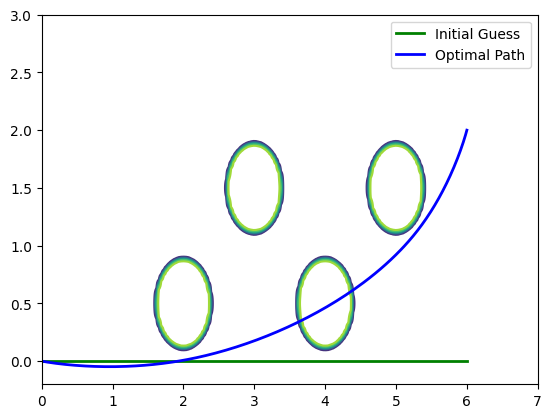

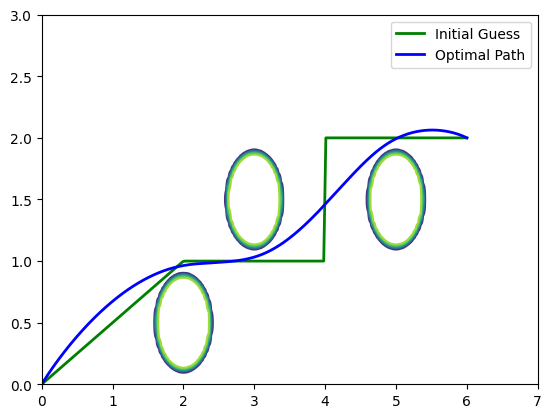

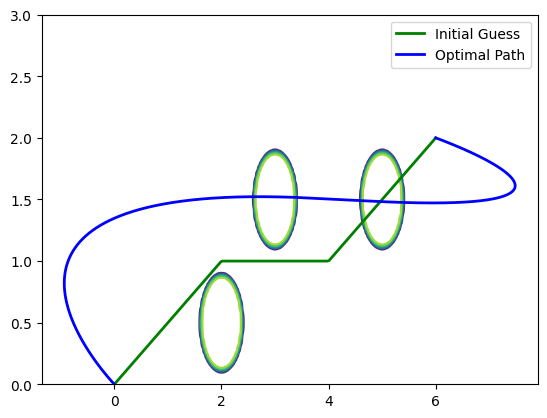

In [67]:
def many_obstacles(r, c, f0):
    # Define the weights (same)
    W1 = 100
    W2 = 20
    
    # Define the ODE
    def ode(t, y):
        return np.array([
            y[2],
            y[3],
            y[6] / (2 * W2),
            y[7] / (2 * W2),
            sum(obstacle_dx(y[0], y[1], W1, r[i], c[i]) for i in range(3)), # Sums over all the ellipses
            sum(obstacle_dy(y[0], y[1], W1, r[i], c[i]) for i in range(3)),
            -y[4],
            -y[5]
        ])
    
    # Define the boundary conditions (same)
    def bc(ya, yb):
        return np.array([
            ya[0] - 6,
            ya[1] - 2,
            ya[2],
            ya[3],
            yb[0],
            yb[1],
            yb[2],
            yb[3]
        ])
    
    # Define the initial guess
    t_steps = 200
    t_eval = np.linspace(0, 20, t_steps)
    y0 = np.zeros((8, t_steps))
    x = np.linspace(0, 6, t_steps)
    y0[0, :] = x[::-1]
    y0[1, :] = f(x)[::-1]
    y0[2, :] = -1 * np.ones(t_steps)
    
    # Solve the ODE
    sol = solve_bvp(ode, bc, t_eval, y0, max_nodes=30000)
    
    # Plot the obstacle
    X, Y = np.meshgrid(np.linspace(0, 7, 200), np.linspace(0, 3, 200))
    for i in range(len(r)):
        plt.contour(X, Y, obstacle(X, Y, W1, r[i], c[i]))
        
    # Plot the solution
    plt.plot(y0[0], y0[1], c='green', linewidth=2, label='Initial Guess')
    plt.plot(sol.y[0], sol.y[1], c='blue', linewidth=2, label='Optimal Path')
    plt.legend()
    
    plt.show()
    
# Set multiple obstacles
r = [(0.15, 0.15), (0.15, 0.15), (0.15, 0.15), (0.15, 0.15)]        # Multiple sets of radii
c = [(2, 0.5), (3, 1.5), (5, 1.5), (4, 0.5)]   # Multiple Centers

def f(x_):
    return 0 * x_

many_obstacles(r, c, f)

# Second
r = [(0.15, 0.15), (0.15, 0.15), (0.15, 0.15)]
c = [(2, 0.5), (3, 1.5), (5, 1.5)]

def f(x_):
    return (x_ / 2) * (x_ <= 2) + 1 * (2 < x_) * (x_ <= 4) + 2 * (4 < x_) #+ (x_ - 2) * (3 < x_) * (x_ < 4)

many_obstacles(r, c, f)

def f(x_):
    return (x_ / 2) * (x_ <= 2) + 1 * (2 < x_) * (x_ <= 4) + (x_ / 2 - 1) * (4 < x_)

many_obstacles(r, c, f)

Lessons learned from this:
- The initial guess is absolutely critical. If the initial guess passes through the obstacle, crap hits the fan. This will make things really difficult when making moving obstacles.
- Also, it's hard to tune the weights to do what we want.